# How to use `layout`

In [1]:
import sys
sys.path.append('../')
import qreative

/usr/local/lib/python3.7/site-packages/pydub/utils.py:165: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


## `layout`

In the current era of quantum computing, we often have to take into account the details of a device when creating our projects. The `layout` class has some tools do help us do this.

To create a layout object, we need to supply the device that the object is going to be based on. For this you can use a string specifying an IBM device (`'ibmq_5_tenerife'` or `'ibmq_16_melbourne'`). You can also supply a list of the form `[Lx,Ly]`, which creates a device based on an `Lx` $\times$ `Ly` square lattice.

In this example, we'll use `'ibmq_16_melbourne'`.

In [2]:
L = qreative.layout('ibmq_16_melbourne')

With this we can ask for the number of qubits on the device

In [3]:
L.num

14

We can also get the pairs of qubits for which a controlled gate can be directly implemented.

In [4]:
L.pairs

{'A': [1, 0],
 'B': [1, 2],
 'C': [2, 3],
 'D': [4, 3],
 'E': [4, 10],
 'F': [5, 4],
 'G': [5, 6],
 'H': [5, 9],
 'I': [6, 8],
 'J': [7, 8],
 'K': [9, 8],
 'L': [9, 10],
 'M': [11, 3],
 'N': [11, 10],
 'O': [11, 12],
 'P': [12, 2],
 'Q': [13, 1],
 'R': [13, 12]}

For real devices, these pairs are taken from `backend.configuration` in QISKit. However, the names for the pairs are defined here to serve as a useful shorthand when referring to them.

Also defined here are a set of positions for the qubits, which can be used to create an image of the device.

In [5]:
L.pos

{0: (0, 1),
 1: (1, 1),
 2: (2, 1),
 3: (3, 1),
 4: (4, 1),
 5: (5, 1),
 6: (6, 1),
 7: (7, 0),
 8: (6, 0),
 9: (5, 0),
 10: (4, 0),
 11: (3, 0),
 12: (2, 0),
 13: (1, 0),
 'A': [0.5, 1.0],
 'B': [1.5, 1.0],
 'C': [2.5, 1.0],
 'D': [3.5, 1.0],
 'E': [4.0, 0.5],
 'F': [4.5, 1.0],
 'G': [5.5, 1.0],
 'H': [5.0, 0.5],
 'I': [6.0, 0.5],
 'J': [6.5, 0.0],
 'K': [5.5, 0.0],
 'L': [4.5, 0.0],
 'M': [3.0, 0.5],
 'N': [3.5, 0.0],
 'O': [2.5, 0.0],
 'P': [2.0, 0.5],
 'Q': [1.0, 0.5],
 'R': [1.5, 0.0]}

The entries in this dict with an integer key give the coordinates for the corresponding qubit.

As a bit of bonus information, there are also positions with pair names as keys. This give the position at the midpoint between the two qubits in each pair.

By calling the `plot` method, we can turn this into an image.

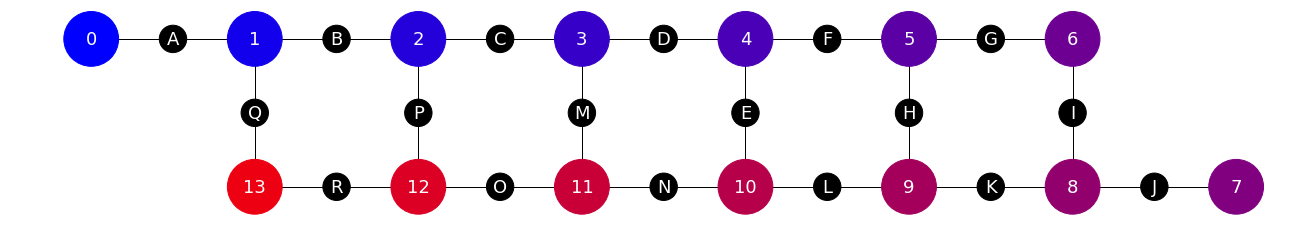

In [6]:
L.plot()

A call to `plot` with no arguments, as above, has a coloured dot to represent each qubit and a small black one for each pair. These are labelled with the qubit number and pair name, respectively. A colour gradient is used that depends on the qubit number.

The `plot` method also has kwargs that can be used for different colours, labels and sizes. In fact, there are the kwargs `colors`, `labels` and `sizes`. Just supply a dictionary for each of these that has qubit numbers and pair names as keys (i.e. the same keys as `pos`), and the correponding colour (as an rgb tuple or string), label (as a string) or size (as an int or float) as values.

Here's a random example

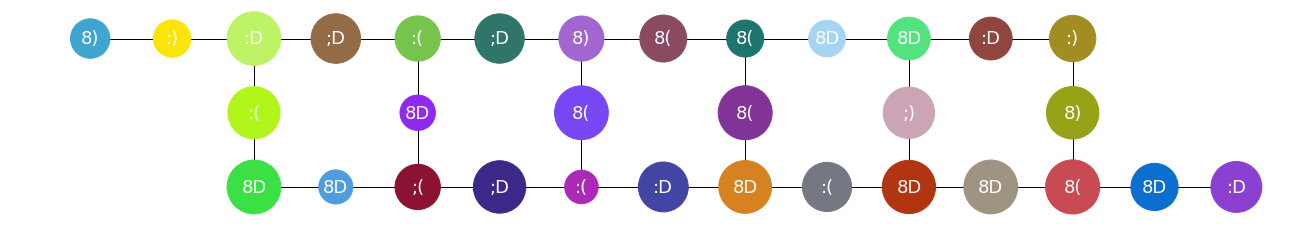

In [7]:
colors = {}
labels = {}
sizes = {}
import random
for node in L.pos:
    colors[node] = (random.random(),random.random(),random.random())
    labels[node] = random.choice([';',':','8']) + random.choice([')','(','D'])
    sizes[node] = 1000+2000*(random.random())
    
L.plot(colors=colors,labels=labels,sizes=sizes)

You can also use it to plot a representation of the output of a program. For example, lets get the statistics for a superposition of bit strings.

In [8]:
stats = qreative.bitstring_superposer(['1100011001111100','0110010101011001'])
print(stats)

{'1100011001111100': 0.5244140625, '0110010101011001': 0.4755859375}


We can then pass this to the `calculate_probs` method of this class, which will determine the probability that each qubit has an output of `1`, and the probability that each pair has an output that is different.

In [9]:
probs = L.calculate_probs(stats)
print(probs)

{0: 0.4755859375, 1: 0, 2: 0.5244140625, 3: 1.0, 4: 1.0, 5: 0.5244140625, 6: 1.0, 7: 0, 8: 0.4755859375, 9: 0.5244140625, 10: 1.0, 11: 0, 12: 0, 13: 0.4755859375, 'A': 0.4755859375, 'B': 0.5244140625, 'C': 0.4755859375, 'D': 0, 'E': 0, 'F': 0.4755859375, 'G': 0.4755859375, 'H': 0, 'I': 0.5244140625, 'J': 0.4755859375, 'K': 1.0, 'L': 0.4755859375, 'M': 1.0, 'N': 1.0, 'O': 0, 'P': 0.5244140625, 'Q': 0.4755859375, 'R': 0.4755859375}


The `plot` method then has a `probs` kwarg that can take the output from this. The percentage probabilities are displayed for each qubit and pair, with a gradient colour between red (for 0%) and blue (for 100%).

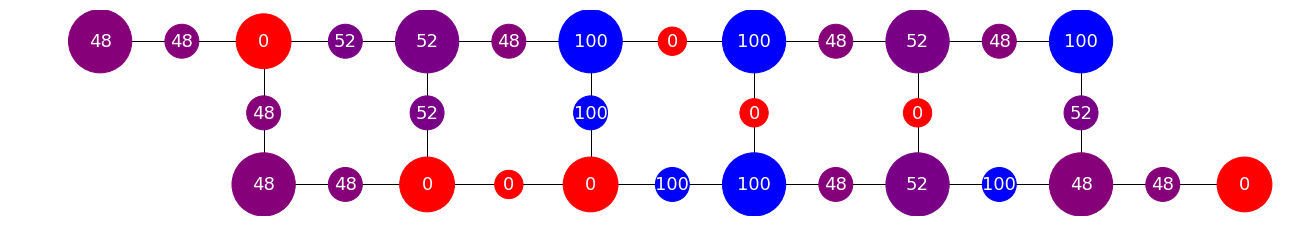

In [10]:
L.plot(probs=probs)

Any additional information supplied to `colors`, `labels` and `sizes` will overwrite the values created from `stats`. For example, we can change the colour for qubit 0.

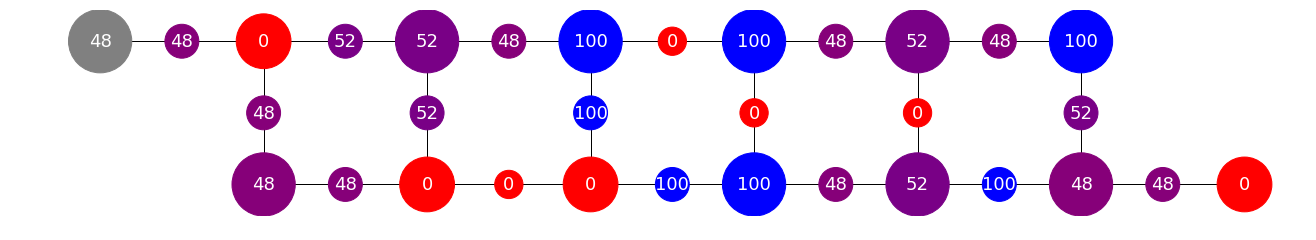

In [11]:
L.plot(probs=probs,colors={0:(0.5,0.5,0.5)})

The project that inspired this tool is [Quantum Awesomeness](https://github.com/decodoku/A_Game_to_Benchmark_Quantum_Computers/blob/master/README.md), so let's set up a quick Quantum Awesomeness puzzle.

To do this, we won't set up and run a quantum program using qreative. Instead we'll do it directly with Qiskit Terra. 

In [12]:
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit, execute, Aer
import numpy as np
qr = QuantumRegister(16)
cr = ClassicalRegister(16)
qc = QuantumCircuit(qr, cr)
correct_pairs = ['A','P','D','N','H','I']
for pair in correct_pairs:
    qc.rx(random.random()*np.pi,qr[L.pairs[pair][0]])
    qc.cx(qr[L.pairs[pair][0]],qr[L.pairs[pair][1]])
qc.measure(qr,cr)

The cell above set up the quantum program we need. Now we just have to run it.

When running circuits using qreative tools, we can use the `shots`, `device` and `noisy` kwargs explained in [the README](README.md). When using Qiskit Terra, we run circuits with the `execute` command. This has the `shots` kwarg, but the information for the other two is handled in a different way. Fortunately, there are tools from qreative to help you do translate. 

Below we take standard `device` and `noisy` arguments for qreative, and turn them into `backend` and `noise_model` objects for Qiskit Terra.

In [14]:
device = 'qasm_simulator'
backend = qreative.get_backend(device)

noisy = True
noise_model = qreative.get_noise(noisy)

Now we can run the job and get the results.

In [15]:
try:
    job = execute(qc,backend,noise_model=noise_model)
except:
    job = execute(qc,backend)
stats = job.result().get_counts()

Now we've set up the puzzle we can run a game of Quantum Awesomeness using `layout`.

*Note: The following cell is interactive so you'll need to run it yourself*

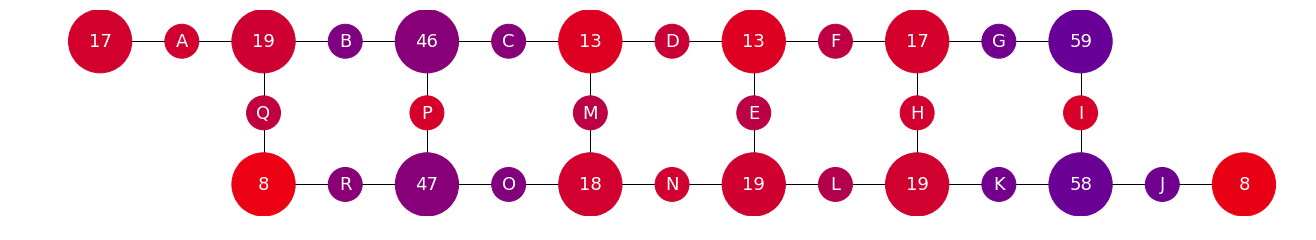

In [ ]:
probs = L.calculate_probs(stats) 

pair_labels = {}
for node in L.pos:
    if type(node)==str:
        pair_labels[node] = node

chosen_pairs = []
colors = {}
while len(chosen_pairs)<6:
    L.plot(probs=probs,labels=pair_labels,colors=colors)
    pair = str.upper(input("    > Type the name of a pair of qubits whose numbers are the same (or very similar)...\n"))
    chosen_pairs.append( pair )
    colors[pair] = (0.5,0.5,0.5)
    for j in range(2):
        colors[L.pairs[pair][j]] = (0.5,0.5,0.5)

L.plot(probs=probs,labels=pair_labels,colors=colors)
if set(chosen_pairs)==set(correct_pairs):
    print("\n    **You got all the correct pairs! :) **\n")
else:
    print("\n    **You didn't get all the correct pairs! :( **\n")